In [ ]:
import urllib
from IPython.display import Markdown as md
_nb_loc = "Workshop-I/3.Model-CNN-Personnalise--bloodMNIST-TFRecods.ipynb" # change to reflect your notebook
_nb_title = "BloodMNIST<br> Standardized Biomedical Images" # change to reflect your notebook
_nb_message = "" # change to reflect your notebook
_icons=["https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png", "https://www.tensorflow.org/images/colab_logo_32px.png", "https://www.tensorflow.org/images/GitHub-Mark-32px.png", "https://www.tensorflow.org/images/download_logo_32px.png"]
_links=["https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?" + urllib.parse.urlencode({"name": _nb_title, "download_url": "https://github.com/GoogleCloudPlatform/practical-ml-vision-book/raw/master/"+_nb_loc}), "https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}".format(_nb_loc), "https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}".format(_nb_loc), "https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/{0}".format(_nb_loc)]
md("""<table class="tfo-notebook-buttons" align="left"><td><a target="_blank" href="{0}"><img src="{4}"/>Run in AI Platform Notebook</a></td><td><a target="_blank" href="{1}"><img src="{5}" />Run in Google Colab</a></td><td><a target="_blank" href="{2}"><img src="{6}" />View source on GitHub</a></td><td><a href="{3}"><img src="{7}" />Download notebook</a></td></table><br/><br/><h1>{8}</h1>{9}""".format(_links[0], _links[1], _links[2], _links[3], _icons[0], _icons[1], _icons[2], _icons[3], _nb_title, _nb_message))

<table>
    <tr>
    <th>
        <table>
            <tr>
                 <th  style="font-size:150%;ftext-align:left;background-color:#053061;color:white;">Valeur</th>
                 <th  style="font-size:150%;text-align:left;background-color:#053061;color:white;">Nom classe</th>
             </tr>
            <tr>
                <th  style="font-size:150%;text-align:left">0</th>
                <th  style="font-size:150%;text-align:left">basophil</th>
            </tr>
            <tr>
                <th  style="font-size:150%;text-align:left">1</th>
                <th  style="font-size:150%;text-align:left;">eosinophil</th>
            </tr>
            <tr>
                <th  style="font-size:150%;text-align:left">2</th>
                <th  style="font-size:150%;text-align:left">erythroblast</th>
            </tr>
            <tr>
                <th  style="font-size:150%;text-align:left">3</th>
                <th  style="font-size:150%;text-align:left">immature</th>
            </tr>
            <tr>
                <th  style="font-size:150%;text-align:left">4</th>
                <th  style="font-size:150%;text-align:left;">lymphocyte</th>
            </tr>
            <tr>
                <th  style="font-size:150%;text-align:left">5</th>
                <th  style="font-size:150%;text-align:left;">monocyte</th>
            </tr>
            <tr>
                <th  style="font-size:150%;text-align:left">6</th>
                <th  style="font-size:150%;text-align:left;">neutrophil</th>
            </tr>
            <tr>
                <th  style="font-size:150%;text-align:left">7</th>
                <th  style="font-size:150%;text-align:left">platelet</th>
            </tr>
        </table>
    </th>
    <th>
        <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'>BloodMNIST<br> Standardized Biomedical Images</div>
        <img src="https://raw.githubusercontent.com/rbizoi/FHU_TARGET_ScientificDays_2025/refs/heads/main/images/bloodMNIST8.png" width="512">
    </th>
    </tr>
</table>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://github.com/MedMNIST/MedMNIST/tree/main">Veuillez vous référer à la page Github officielle pour plus de détails.</a></div>

>> **site du projet** : https://medmnist.com/

>> **site de données** : https://zenodo.org/records/10519652


# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Initialisation du document</div></b>

In [1]:
import os
# import json
# @param ["tensorflow", "jax", "torch"]
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['KERAS_BACKEND'] = 'tensorflow'  
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['TF_CPP_MIN_LOG_LEVEL']='5'

import tensorflow as tf
import keras
tf.get_logger().setLevel('ERROR')

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Import libriries </div></b>

In [2]:
import numpy as np, pandas as pd, seaborn as sns, warnings, os, sys, time
from matplotlib import pyplot as plt

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=2)

print(f"""La version des librairies utilisées :

Tensorflow : {tf.__version__}\tCUDA {tf.test.is_built_with_cuda()}\tGPU {tf.test.is_built_with_gpu_support()}\tXLA {tf.test.is_built_with_xla()}
Keras      : {keras.version()}
Pandas     : {pd.__version__}
NumPy      : {np.__version__}""")

La version des librairies utilisées :

Tensorflow : 2.17.0	CUDA True	GPU True	XLA True
Keras      : 3.6.0
Pandas     : 2.2.2
NumPy      : 1.26.4


# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Outils du document</div></b>

In [3]:
sys.path.append(os.path.abspath('../outils/'))

In [4]:
if 'configProjet' in sys.modules.keys():  del(sys.modules['configProjet'])
if 'configModele' in sys.modules.keys():  del(sys.modules['configModele'])

In [5]:
from configProjet import palette, initParametresProjet 
from configProjet import afficheHistoriqueEntrainement, afficheProbabilites, afficheMatriceConfusion, afficheDataset, afficheDistributionsPipe

In [ ]:
from configModele import modelDictionnaire, initParametresExecution, getPipelineDataset
from configModele import creationCompilationModele, creationRappelsExecution, entrainementModele
from configModele import sauvegarderModel, sauvegardeHistorique, executeApprentissageChoixClassifieurs
from configModele import modelPersonalise

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Paramétrés de l’exécution et les flux de lecture des fichiers TFRecors</div></b>

In [7]:
image_size,batch_size,epochs,dictLabels,nombreClasses,pipelineApprentissage,pipelineValidation = \
       initParametresExecution(image_size=(28, 28, 3),
                            batch_size = 32,
                            epochs=128,
                            repertoire='../donnees/BloodMNIST',
                            cycle_length=None,
                            deterministic=None,
                            repetition=1,
                            bufferAleatoire=1024)

In [8]:
print(f"""
  image_size    = {image_size}
  batch_size    = {batch_size}
  epochs        = {epochs}
  nombreClasses = {nombreClasses}
  dictLabels    = {dictLabels}
       """)


  image_size    = (28, 28, 3)
  batch_size    = 32
  epochs        = 128
  nombreClasses = 8
  dictLabels    = {0: 'basophil', 1: 'eosinophil', 2: 'erythroblast', 3: 'immature', 4: 'lymphocyte', 5: 'monocyte', 6: 'neutrophil', 7: 'platelet'}
       


# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Affichage données</div></b>

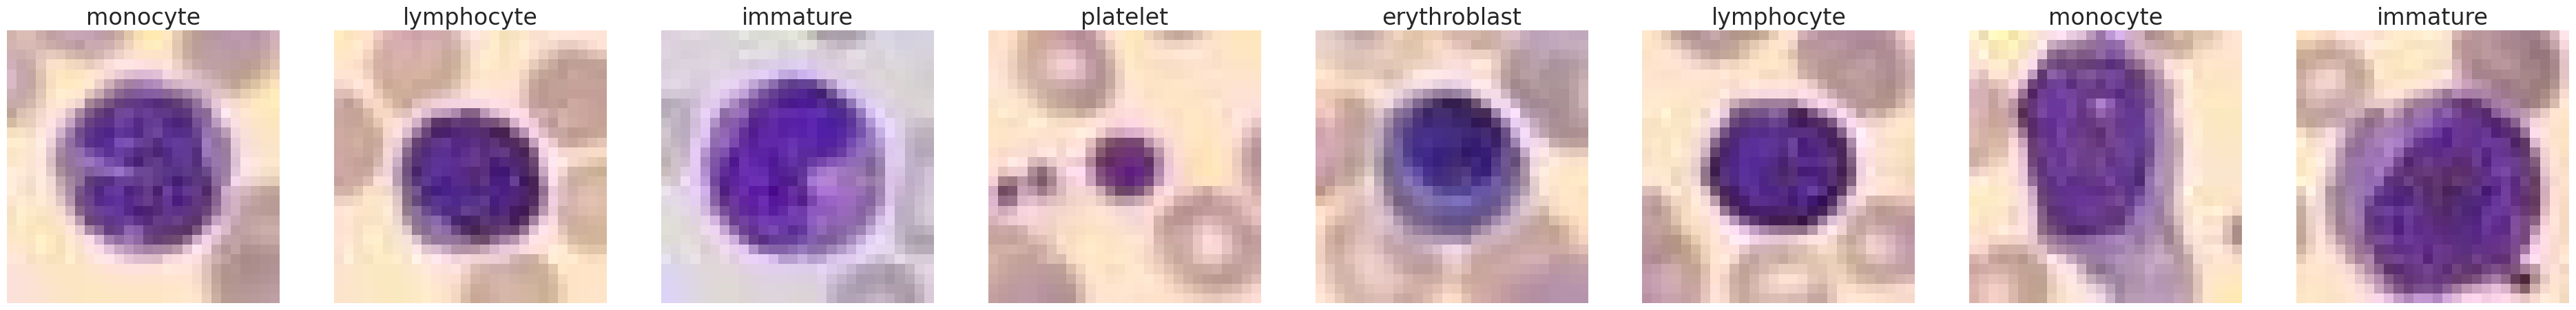

In [9]:
images, labels = next(iter(pipelineApprentissage))
nombresImages = 8
afficheDataset(images, labels,nombresImages,6*nombresImages,dictLabels,cmap=None)

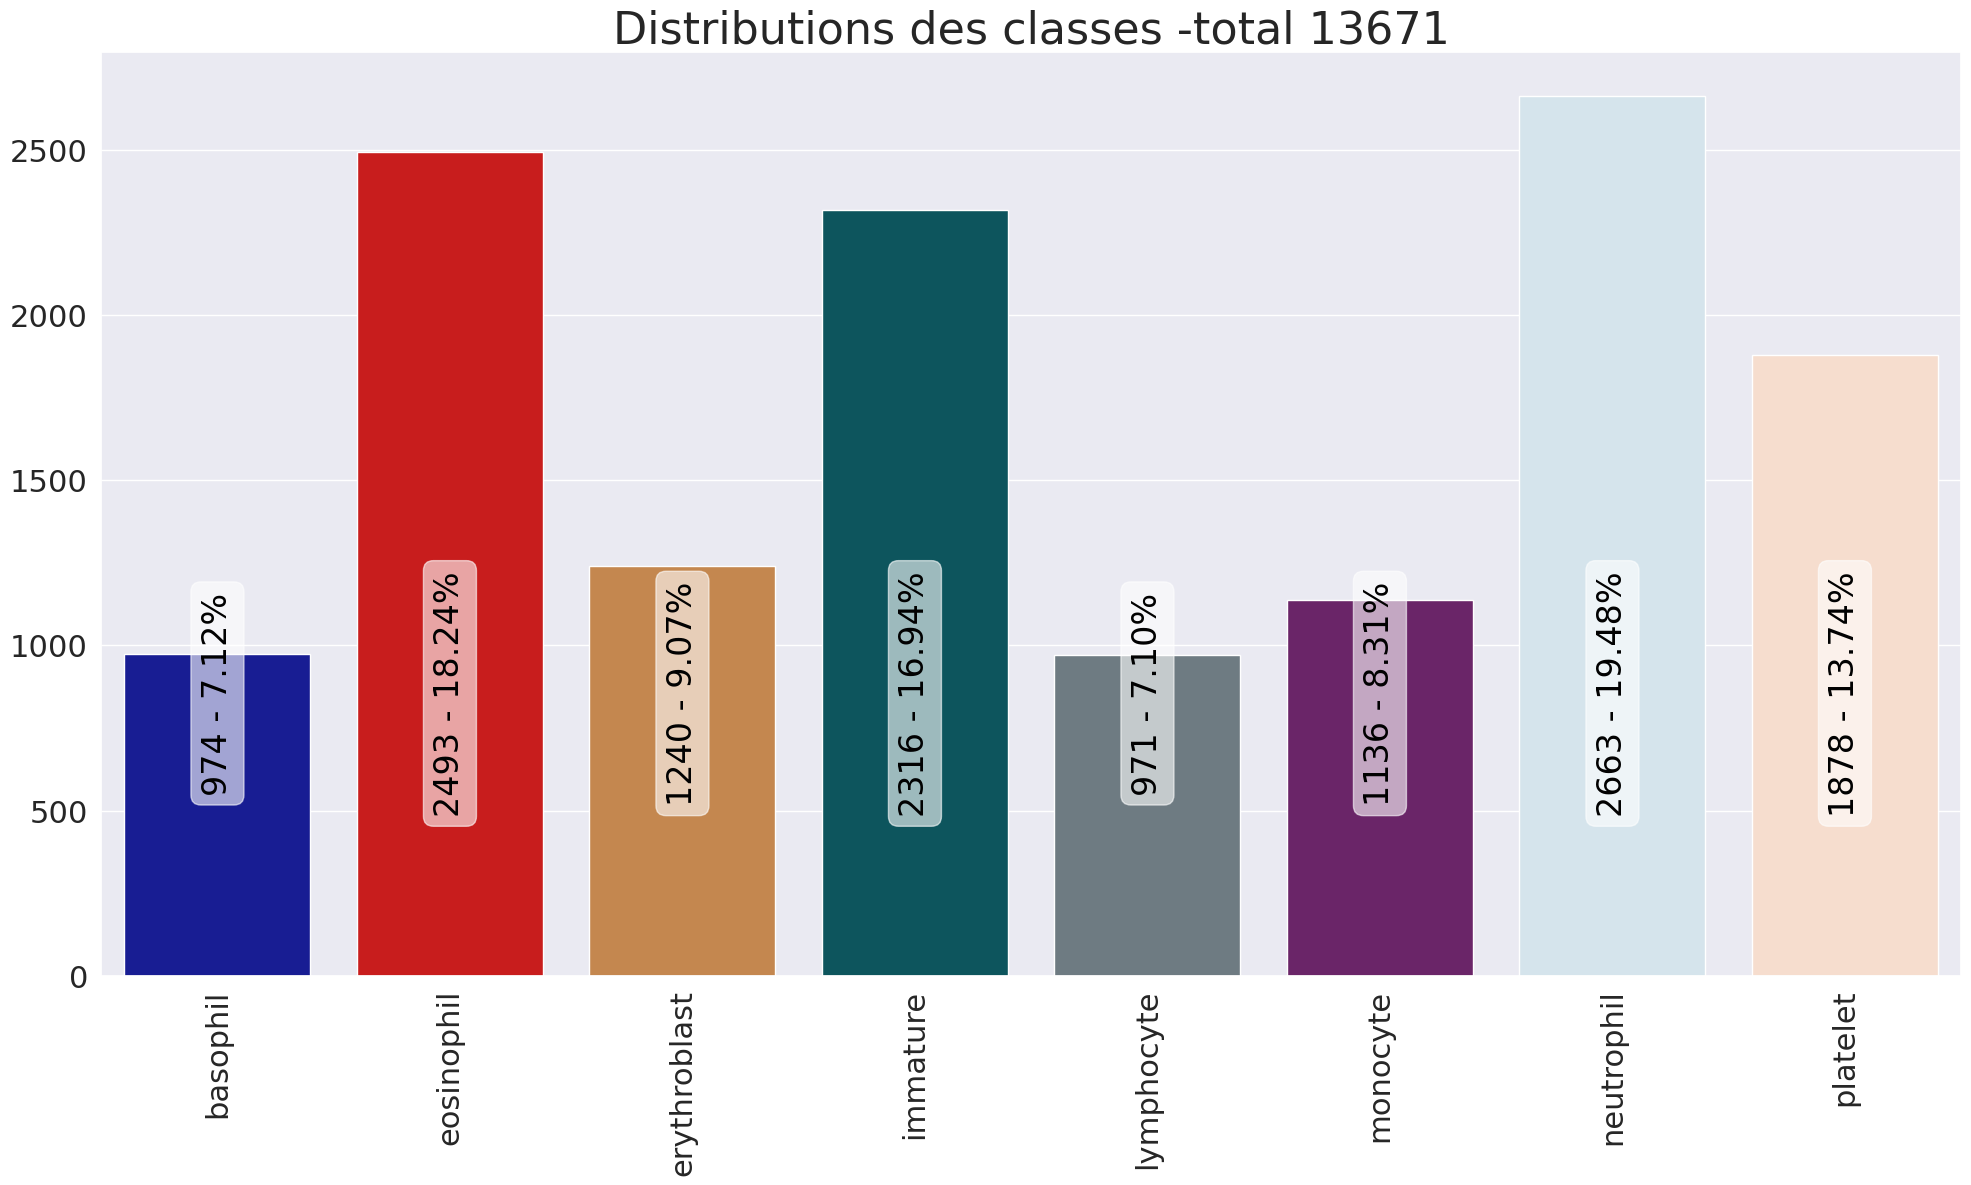

In [10]:
afficheDistributionsPipe(pipelineApprentissage, dictLabels, palette, repertoireEnregistrement=None)

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Choix du modèle</div></b>

In [11]:
nomModel = 'CNN-PersonaliseMNIST'

In [12]:
repertoireEnregistrement,repertoireSauvegardes,repertoireModelCKP,repertoireModelSauvegarde,repertoireModelLogs = \
            initParametresProjet(nomProjet=f"0-bloodMNIST-{nomModel}-bs{batch_size:02d}-epochs{epochs:03d}",repertoireProjet='../ResultatsExecutions')

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Création et compilation d'un modèle</div></b>

In [13]:
# Squeezenet architecture
def blockSqueezeNet(x, squeeze, expand):
    
    y  = keras.layers.Conv2D(filters=squeeze, kernel_size=1, padding='same')(x)
    y  = keras.layers.BatchNormalization(scale=False)(y)
    y = keras.layers.Activation(activation)(y)
    
    y1 = keras.layers.Conv2D(filters=expand//2, kernel_size=1, padding='same')(y)
    y1 = keras.layers.BatchNormalization(scale=False)(y1)
    y1 = keras.layers.Activation(activation)(y1)
    
    y3 = keras.layers.Conv2D(filters=expand//2, kernel_size=3, padding='same')(y)
    y3 = keras.layers.BatchNormalization(scale=False)(y3)
    y3 = keras.layers.Activation(activation)(y3)

    z = keras.layers.SeparableConv2D(expand//2, 3, padding="same")(x)
    z = keras.layers.BatchNormalization(scale=False)(z)
    z = keras.layers.Activation(activation)(z)
    
    return keras.layers.concatenate([y1, y3, z])            

## <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Conception du modèle</div></b>

In [14]:
preprocessData = tf.keras.Sequential([
        keras.layers.Rescaling(1.0 / 255),
    ])

In [15]:
listeFiltres=[64,128,256,512]
dropout=0.5 
activation=keras.ops.gelu
        
inputs = keras.Input(shape=image_size)

x = preprocessData(inputs)

x = keras.layers.Conv2D(listeFiltres[0], 3, strides=1, padding="same",kernel_initializer='glorot_normal')(x)
x = keras.layers.BatchNormalization(scale=False)(x)
x = keras.layers.Activation(activation)(x)
previous_block_activation = x  # Set aside residual

for size in listeFiltres[1:]:
    x = blockSqueezeNet(x, size, size*2)    
    x = keras.layers.Conv2D(size, 3, strides=2, padding="same")(x)
    
    residual = keras.layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
    
    x = keras.layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

x = keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
x = keras.layers.BatchNormalization(scale=False)(x)
x = keras.layers.Activation(activation)(x)

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(dropout)(x)
outputs = keras.layers.Dense(nombreClasses, activation="softmax")(x)

model = keras.Model(inputs, outputs)

In [16]:
model.compile(
        optimizer=keras.optimizers.AdamW(1e-03), 
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name='accuracy')],
    )

In [17]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 28, 28, 3) │          0 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │      1,792 │ sequential[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │      8,320 │ activation[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │     16,512 │ activation_1[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │    147,584 │ activation_1[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 28, 28,    │      8,896 │ activation[0][0]  │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 13,814,472 (52.70 MB)

 Trainable params: 13,805,128 (52.66 MB)

 Non-trainable params: 9,344 (36.50 KB)

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Rappels d’exécution (callbacks)</div></b>

In [18]:
def evolutionTauxApprentissage(epoch,
                               initial_lrate=1e-03,
                               max_lrate=1e-03,
                               min_lrate=1e-05,
                               epochs_runup_lrate=0,
                               epochs_sustain_lrate=0,
                               drop_lrate=0.98):
    # epochs_drop = epochs * 0.1
    if epoch < epochs_runup_lrate:
        lrate = (max_lrate - initial_lrate) / epochs_runup_lrate * epoch + initial_lrate
    elif epoch < epochs_runup_lrate + epochs_sustain_lrate:
        lrate = max_lrate
    else:
        lrate = (max_lrate - min_lrate) * drop_lrate**(epoch - epochs_runup_lrate - epochs_sustain_lrate) + min_lrate
    return lrate

filename = os.path.join(repertoireModelSauvegarde, 'modelVLoss.keras')
learningRate = keras.callbacks.LearningRateScheduler(evolutionTauxApprentissage)
checkpointLoss = keras.callbacks.ModelCheckpoint(filename, 
                                                    monitor = 'val_loss',
                                                    verbose = 1, 
                                                    save_best_only = True, 
                                                    mode = 'min')

backupAndRestore = keras.callbacks.BackupAndRestore(backup_dir=repertoireModelCKP, delete_checkpoint=False)
tensorBoard = keras.callbacks.TensorBoard(log_dir=repertoireModelLogs)

arretPrecoce = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, verbose=1)

callbacks = [learningRate,checkpointLoss,backupAndRestore,tensorBoard,arretPrecoce]

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Evolution du taux d'apprentissage</div></b>

L'évolution du taux d'apprentissage : du 0.001 à 8.61e-05


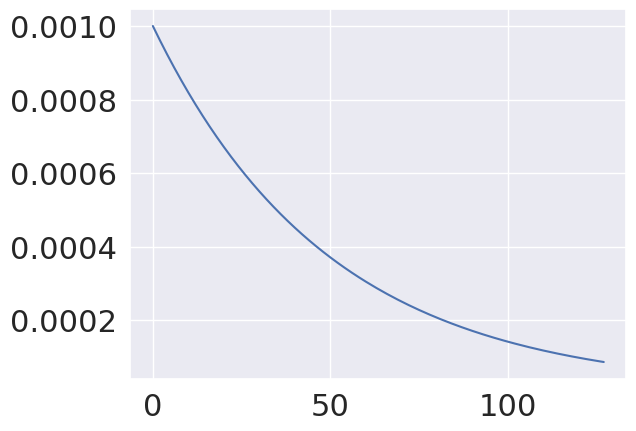

In [19]:
rng = [i for i in range(epochs)]
y = [evolutionTauxApprentissage(x) for x in rng]
plt.plot(rng, y)

print(f"L'évolution du taux d'apprentissage : du {y[0]:.3g} à {min(y):.3g}")

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Entrainement du modèle</div></b>


In [20]:
historiqueApprentissage, model = entrainementModele( model, 
                                                     pipelineApprentissage,
                                                     pipelineValidation, 
                                                     epochs, 
                                                     batch_size,
                                                     callbacks,
                                                     2, #verbose=2, 
                                                     repertoireModelSauvegarde)

Epoch 1/128


I0000 00:00:1757156055.823399  387944 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_loss improved from inf to 9.18672, saving model to ../ResultatsExecutions/0-bloodMNIST-CNN-PersonaliseMNIST-bs32-epochs128/model.sauvegardes/sauvegarde/modelVLoss.keras
428/428 - 23s - 54ms/step - accuracy: 0.8120 - loss: 0.5310 - val_accuracy: 0.1061 - val_loss: 9.1867 - learning_rate: 0.0010
Epoch 2/128

Epoch 2: val_loss improved from 9.18672 to 2.32421, saving model to ../ResultatsExecutions/0-bloodMNIST-CNN-PersonaliseMNIST-bs32-epochs128/model.sauvegardes/sauvegarde/modelVLoss.keras
428/428 - 5s - 11ms/step - accuracy: 0.8777 - loss: 0.3439 - val_accuracy: 0.4852 - val_loss: 2.3242 - learning_rate: 9.8020e-04
Epoch 3/128

Epoch 3: val_loss improved from 2.32421 to 0.99830, saving model to ../ResultatsExecutions/0-bloodMNIST-CNN-PersonaliseMNIST-bs32-epochs128/model.sauvegardes/sauvegarde/modelVLoss.keras
428/428 - 5s - 11ms/step - accuracy: 0.9013 - loss: 0.2709 - val_accuracy: 0.7322 - val_loss: 0.9983 - learning_rate: 9.6080e-04
Epoch 4/128

Epoch 4: val_loss did 

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Affichage historique de l'apprentissage </div></b>

In [21]:
historique = sauvegardeHistorique(historiqueApprentissage,
                                  repertoireSauvegardes,
                                  nomSauvegarde=f'historique-{nomModel}-bs{batch_size:02d}-epochs{epochs:03d}')

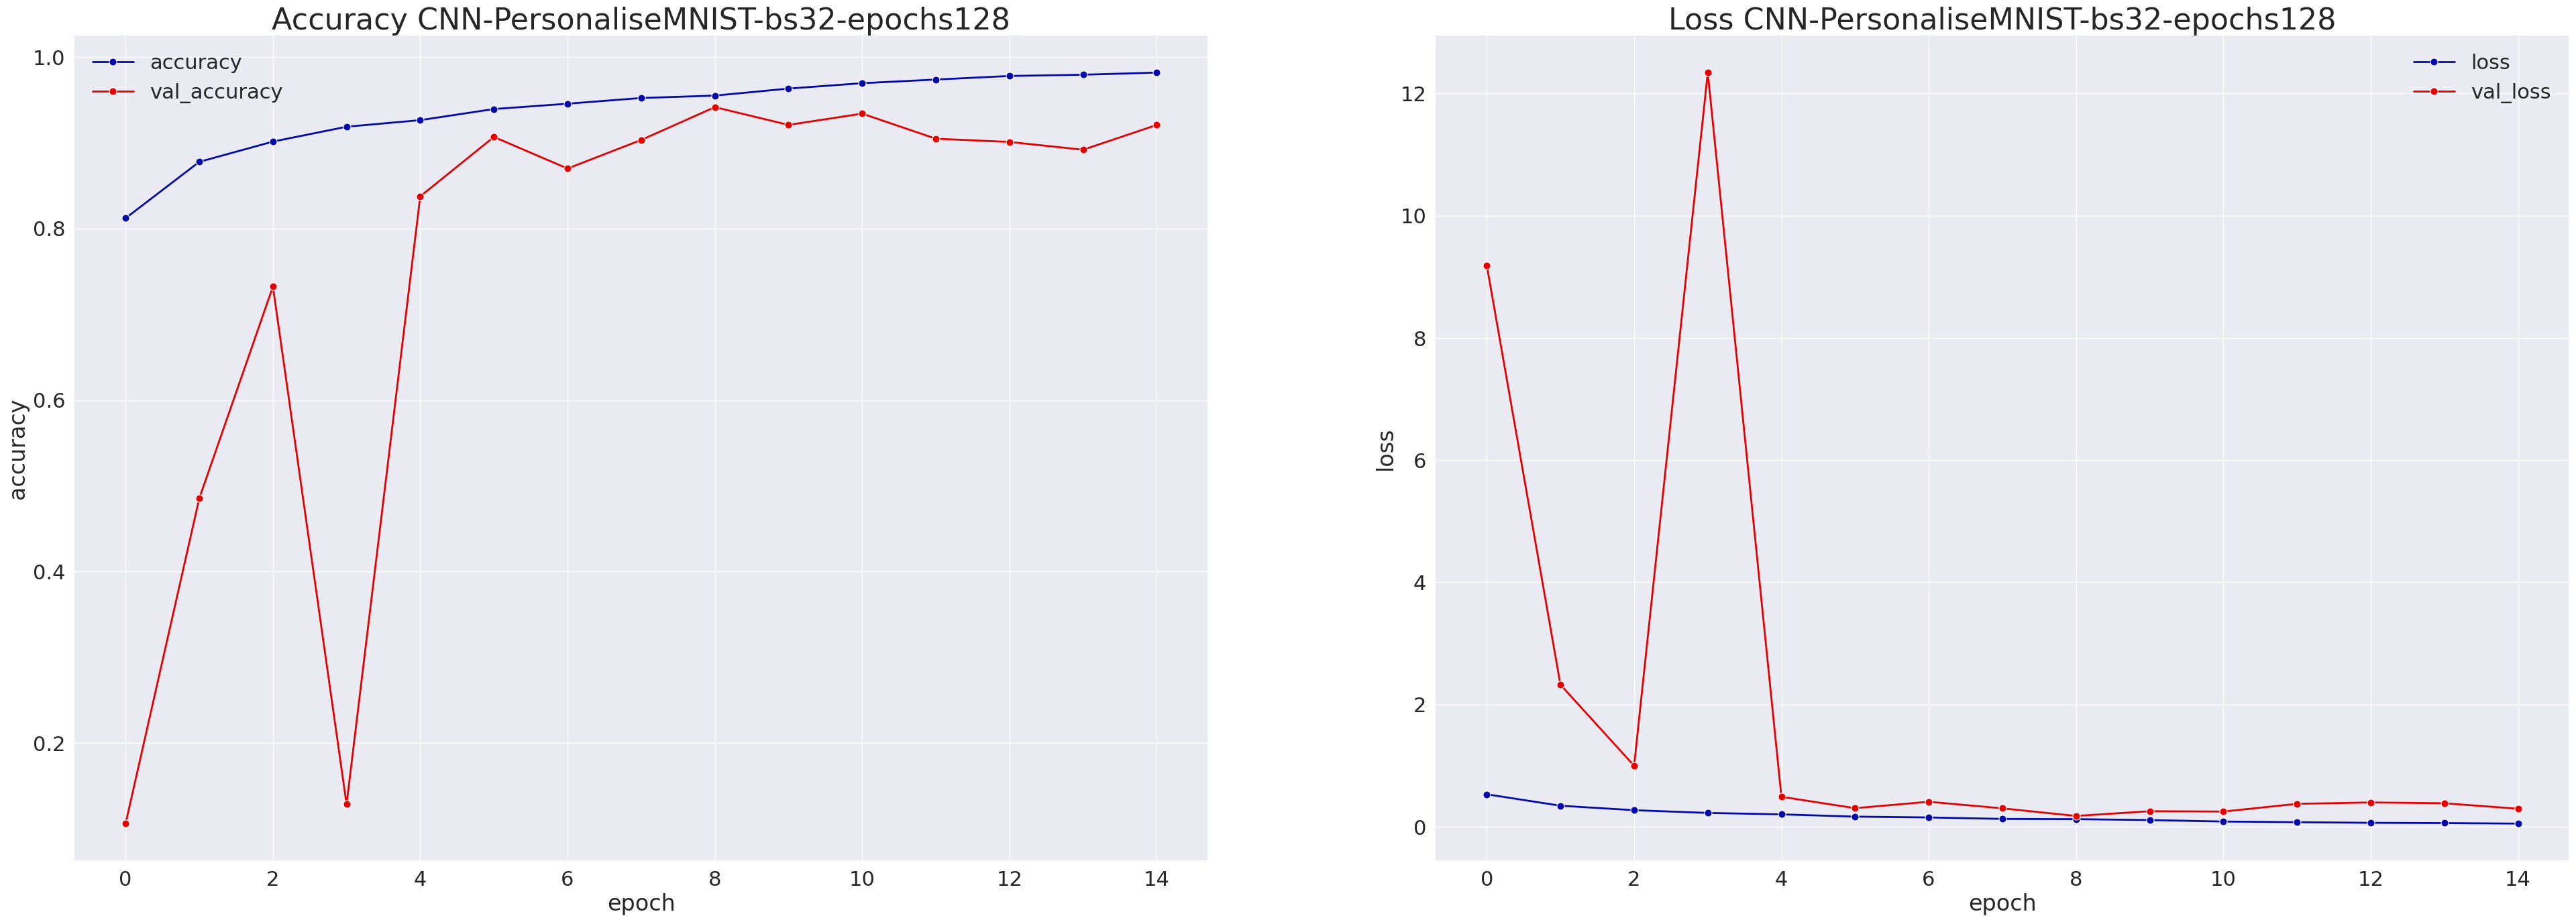

In [22]:
afficheHistoriqueEntrainement(historique, palette, f'{nomModel}-bs{batch_size:02d}-epochs{epochs:03d}', repertoireEnregistrement)

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Sauvegarde du modèle </div></b>

In [23]:
model.save(os.path.join(repertoireModelSauvegarde,f'{nomModel}-bs{batch_size:02d}-epochs{epochs:03d}.keras'))

# <b><div style='padding:18px;background-color:#d8dcd6;color:#030aa7;font-size:130%; border-radius:12px 12px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Inférence</div></b>

In [24]:
for i, (img,lab) in enumerate(pipelineValidation): 
    images = img if i==0 else tf.concat([images,img], 0)   
    labels = lab if i==0 else tf.concat([labels,lab], 0)

In [25]:
probabilities = model.predict(images, verbose=0)
predictions = np.argmax(probabilities, axis=-1)

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Probabilités pour les 8 premiers prédictions </div></b>

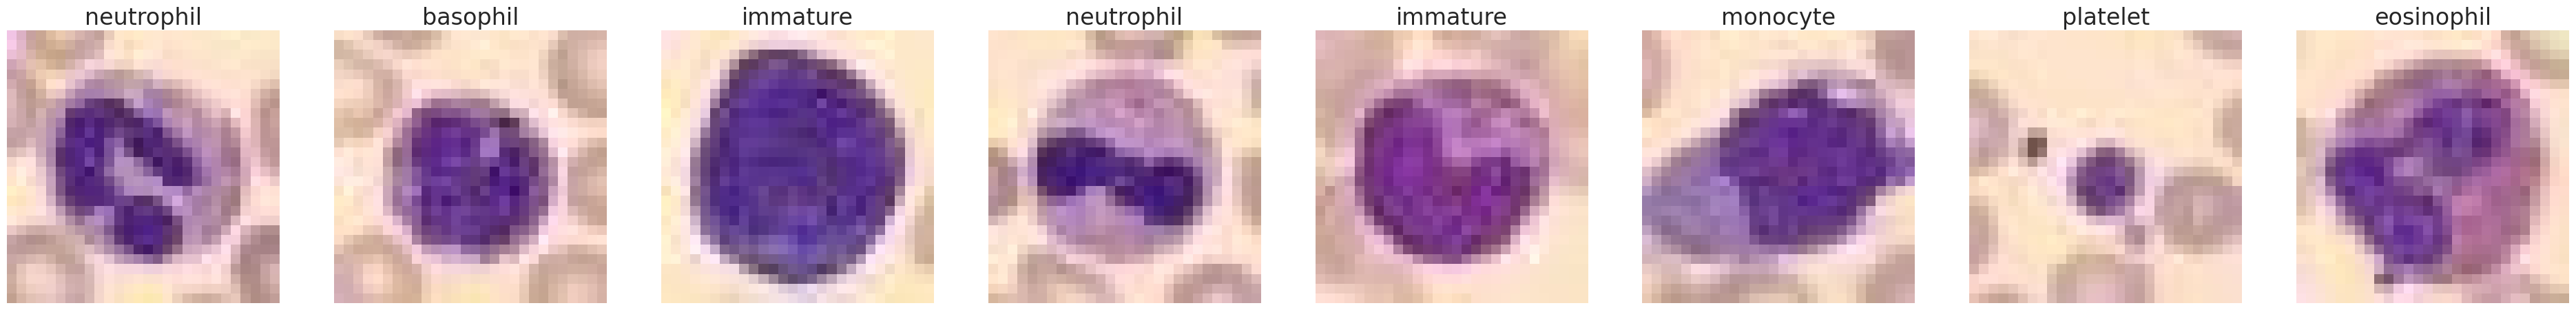

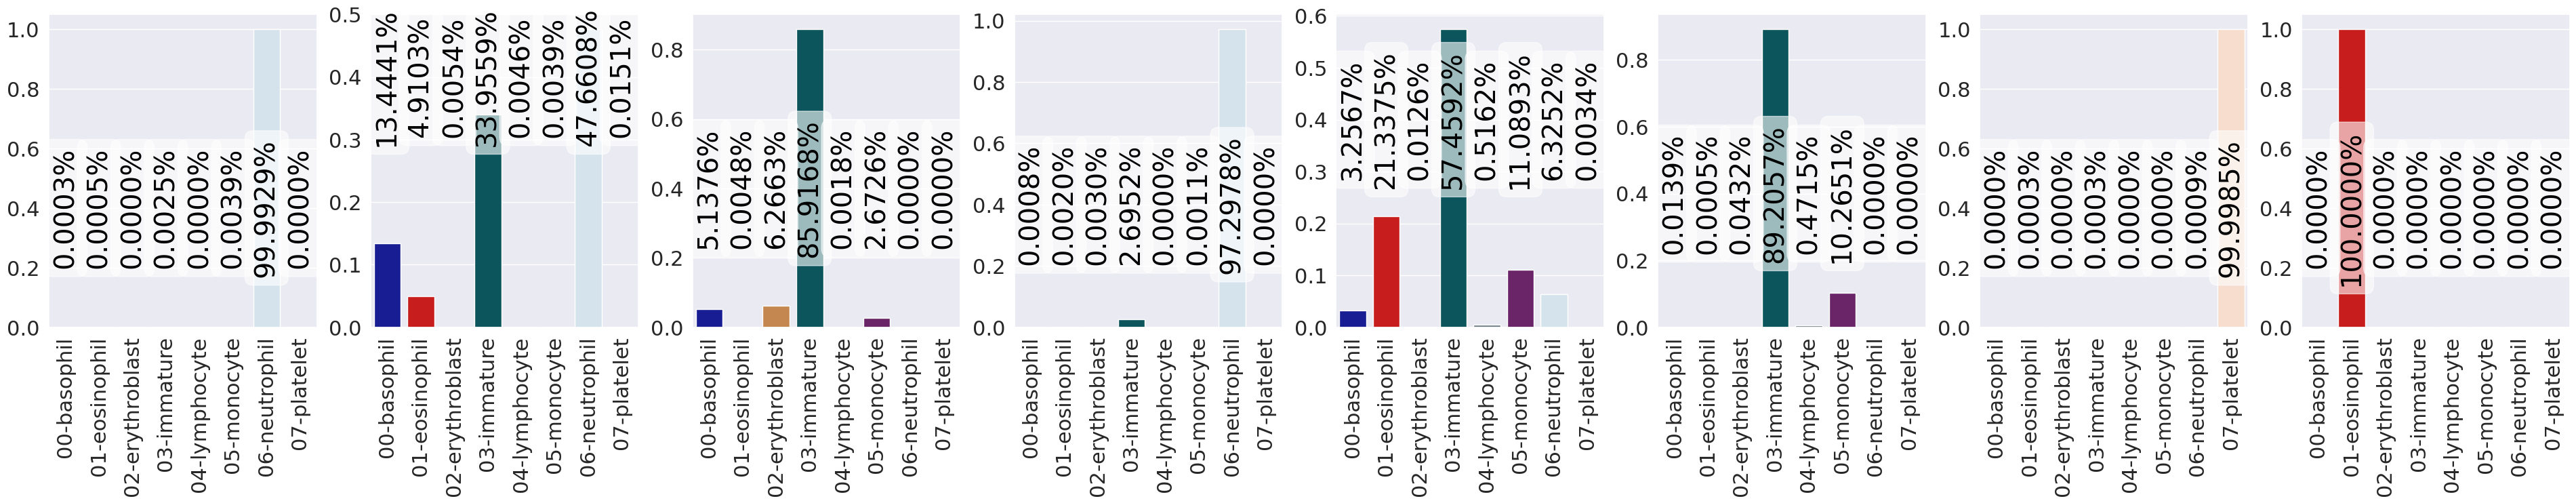

In [26]:
nombresImages = 8
afficheDataset(images, labels,nombresImages,6*nombresImages,dictLabels,cmap=None)
fig, ax = plt.subplots(nrows=1, ncols=nombresImages,figsize=(6*nombresImages,6));
for i in range(nombresImages):
    afficheProbabilites(probabilities,ind=i,ax=ax[i], dictLabels=dictLabels)

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Matrice de Confusion </div></b>

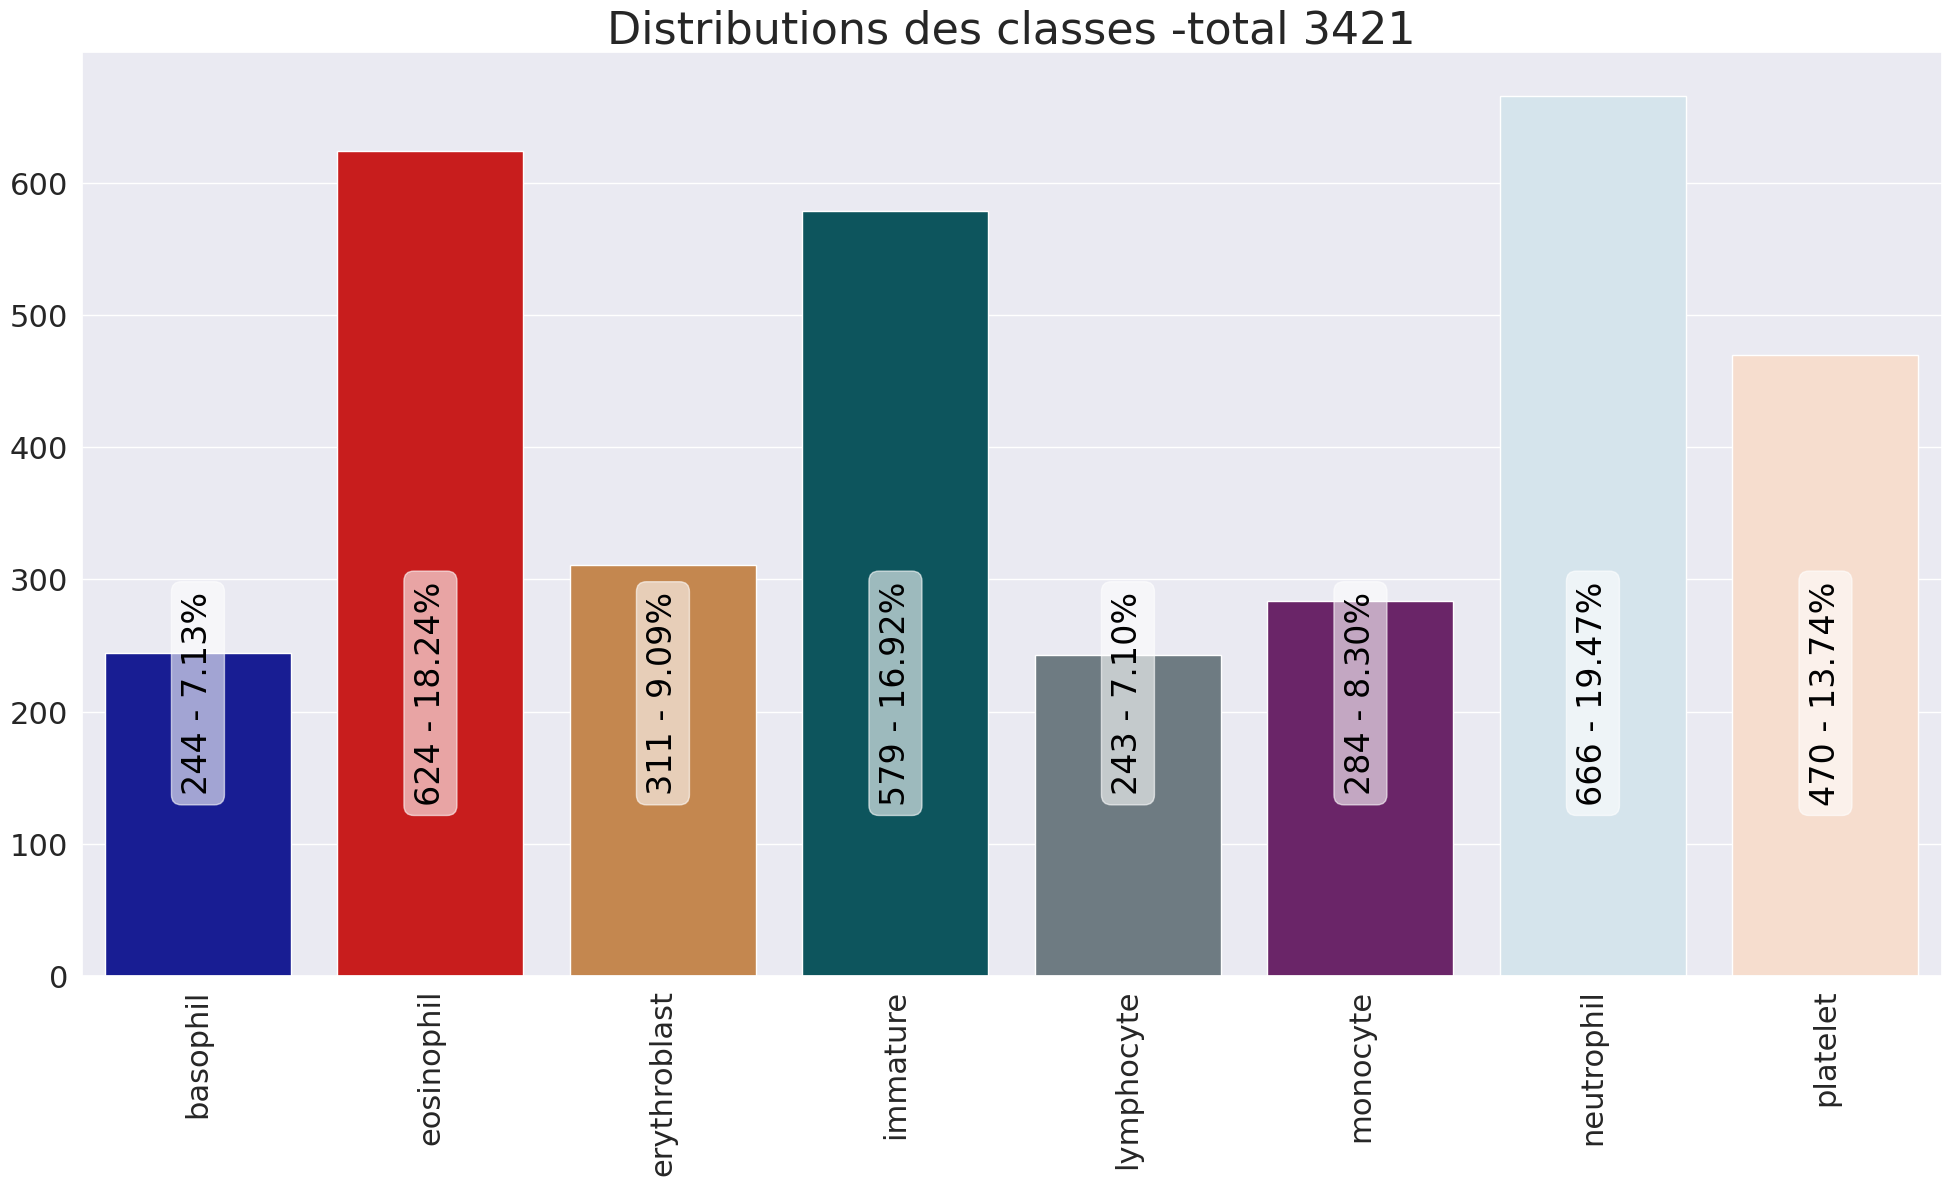

In [27]:
afficheDistributionsPipe(pipelineValidation, dictLabels, palette, repertoireEnregistrement=None)

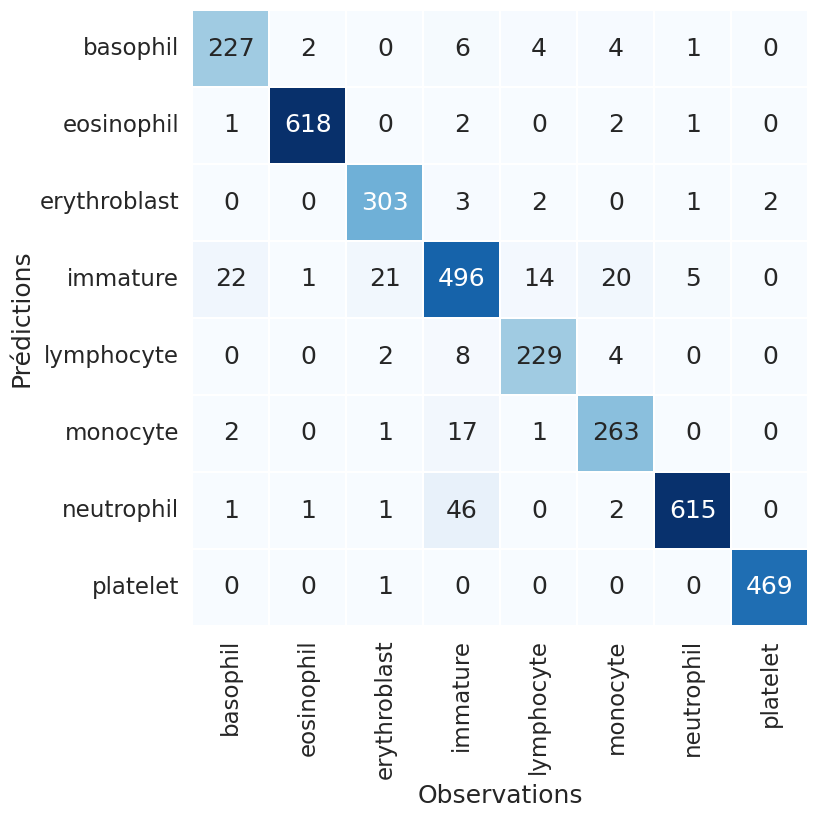

In [28]:
afficheMatriceConfusion(observations=labels,predictions=predictions,dictLabels=dictLabels, repertoireEnregistrement=repertoireEnregistrement,
                        nom_essai = f'{nomModel}-bs{batch_size:02d}-epochs{epochs:03d}')

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:100%; border-radius:10px 10px; box-shadow: 8px 8px 8px #042b4c;text-align: left'>Résultats de l’apprentissage</div></b>

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Area under the ROC curve : 0.9965	--	Exécution  :3.10s


,Classe,aucROC,avgPrecRec,f1,f2,f05,accuracy,precision,sensibilite,vrais_positifs,vrais_negatifs,faux_positifs,faux_negatifs,total_positifs,essai
0,global,0.996549,0.985637,0.941408,0.941231,0.941829,0.941245,0.942247,0.941245,3220,23746,201,201,3421,CNN-PersonaliseMNIST-bs32-epochs128
1,basophil,0.997455,0.974040,0.913481,0.923515,0.903662,0.987431,0.897233,0.930328,227,3151,26,17,244,CNN-PersonaliseMNIST-bs32-epochs128
2,eosinophil,0.999637,0.996515,0.991974,0.991020,0.992931,0.997077,0.993569,0.990385,618,2793,4,6,624,CNN-PersonaliseMNIST-bs32-epochs128
3,erythroblast,0.998806,0.991500,0.946875,0.963128,0.931162,0.990061,0.920973,0.974277,303,3084,26,8,311,CNN-PersonaliseMNIST-bs32-epochs128
4,immature,0.985364,0.934400,0.857390,0.856945,0.857835,0.951768,0.858131,0.856649,496,2760,82,83,579,CNN-PersonaliseMNIST-bs32-epochs128
5,lymphocyte,0.997988,0.976566,0.929006,0.936989,0.921158,0.989769,0.916000,0.942387,229,3157,21,14,243,CNN-PersonaliseMNIST-bs32-epochs128
6,monocyte,0.995686,0.960777,0.908463,0.918938,0.898224,0.984507,0.891525,0.926056,263,3105,32,21,284,CNN-PersonaliseMNIST-bs32-epochs128
7,neutrophil,0.997467,0.994674,0.954228,0.935503,0.973718,0.982754,0.987159,0.923423,615,2747,8,51,666,CNN-PersonaliseMNIST-bs32-epochs128
8,platelet,0.999992,0.999950,0.996812,0.997448,0.996177,0.999123,0.995754,0.997872,469,2949,2,1,470,CNN-PersonaliseMNIST-bs32-epochs128


<Figure size 1800x1800 with 0 Axes>

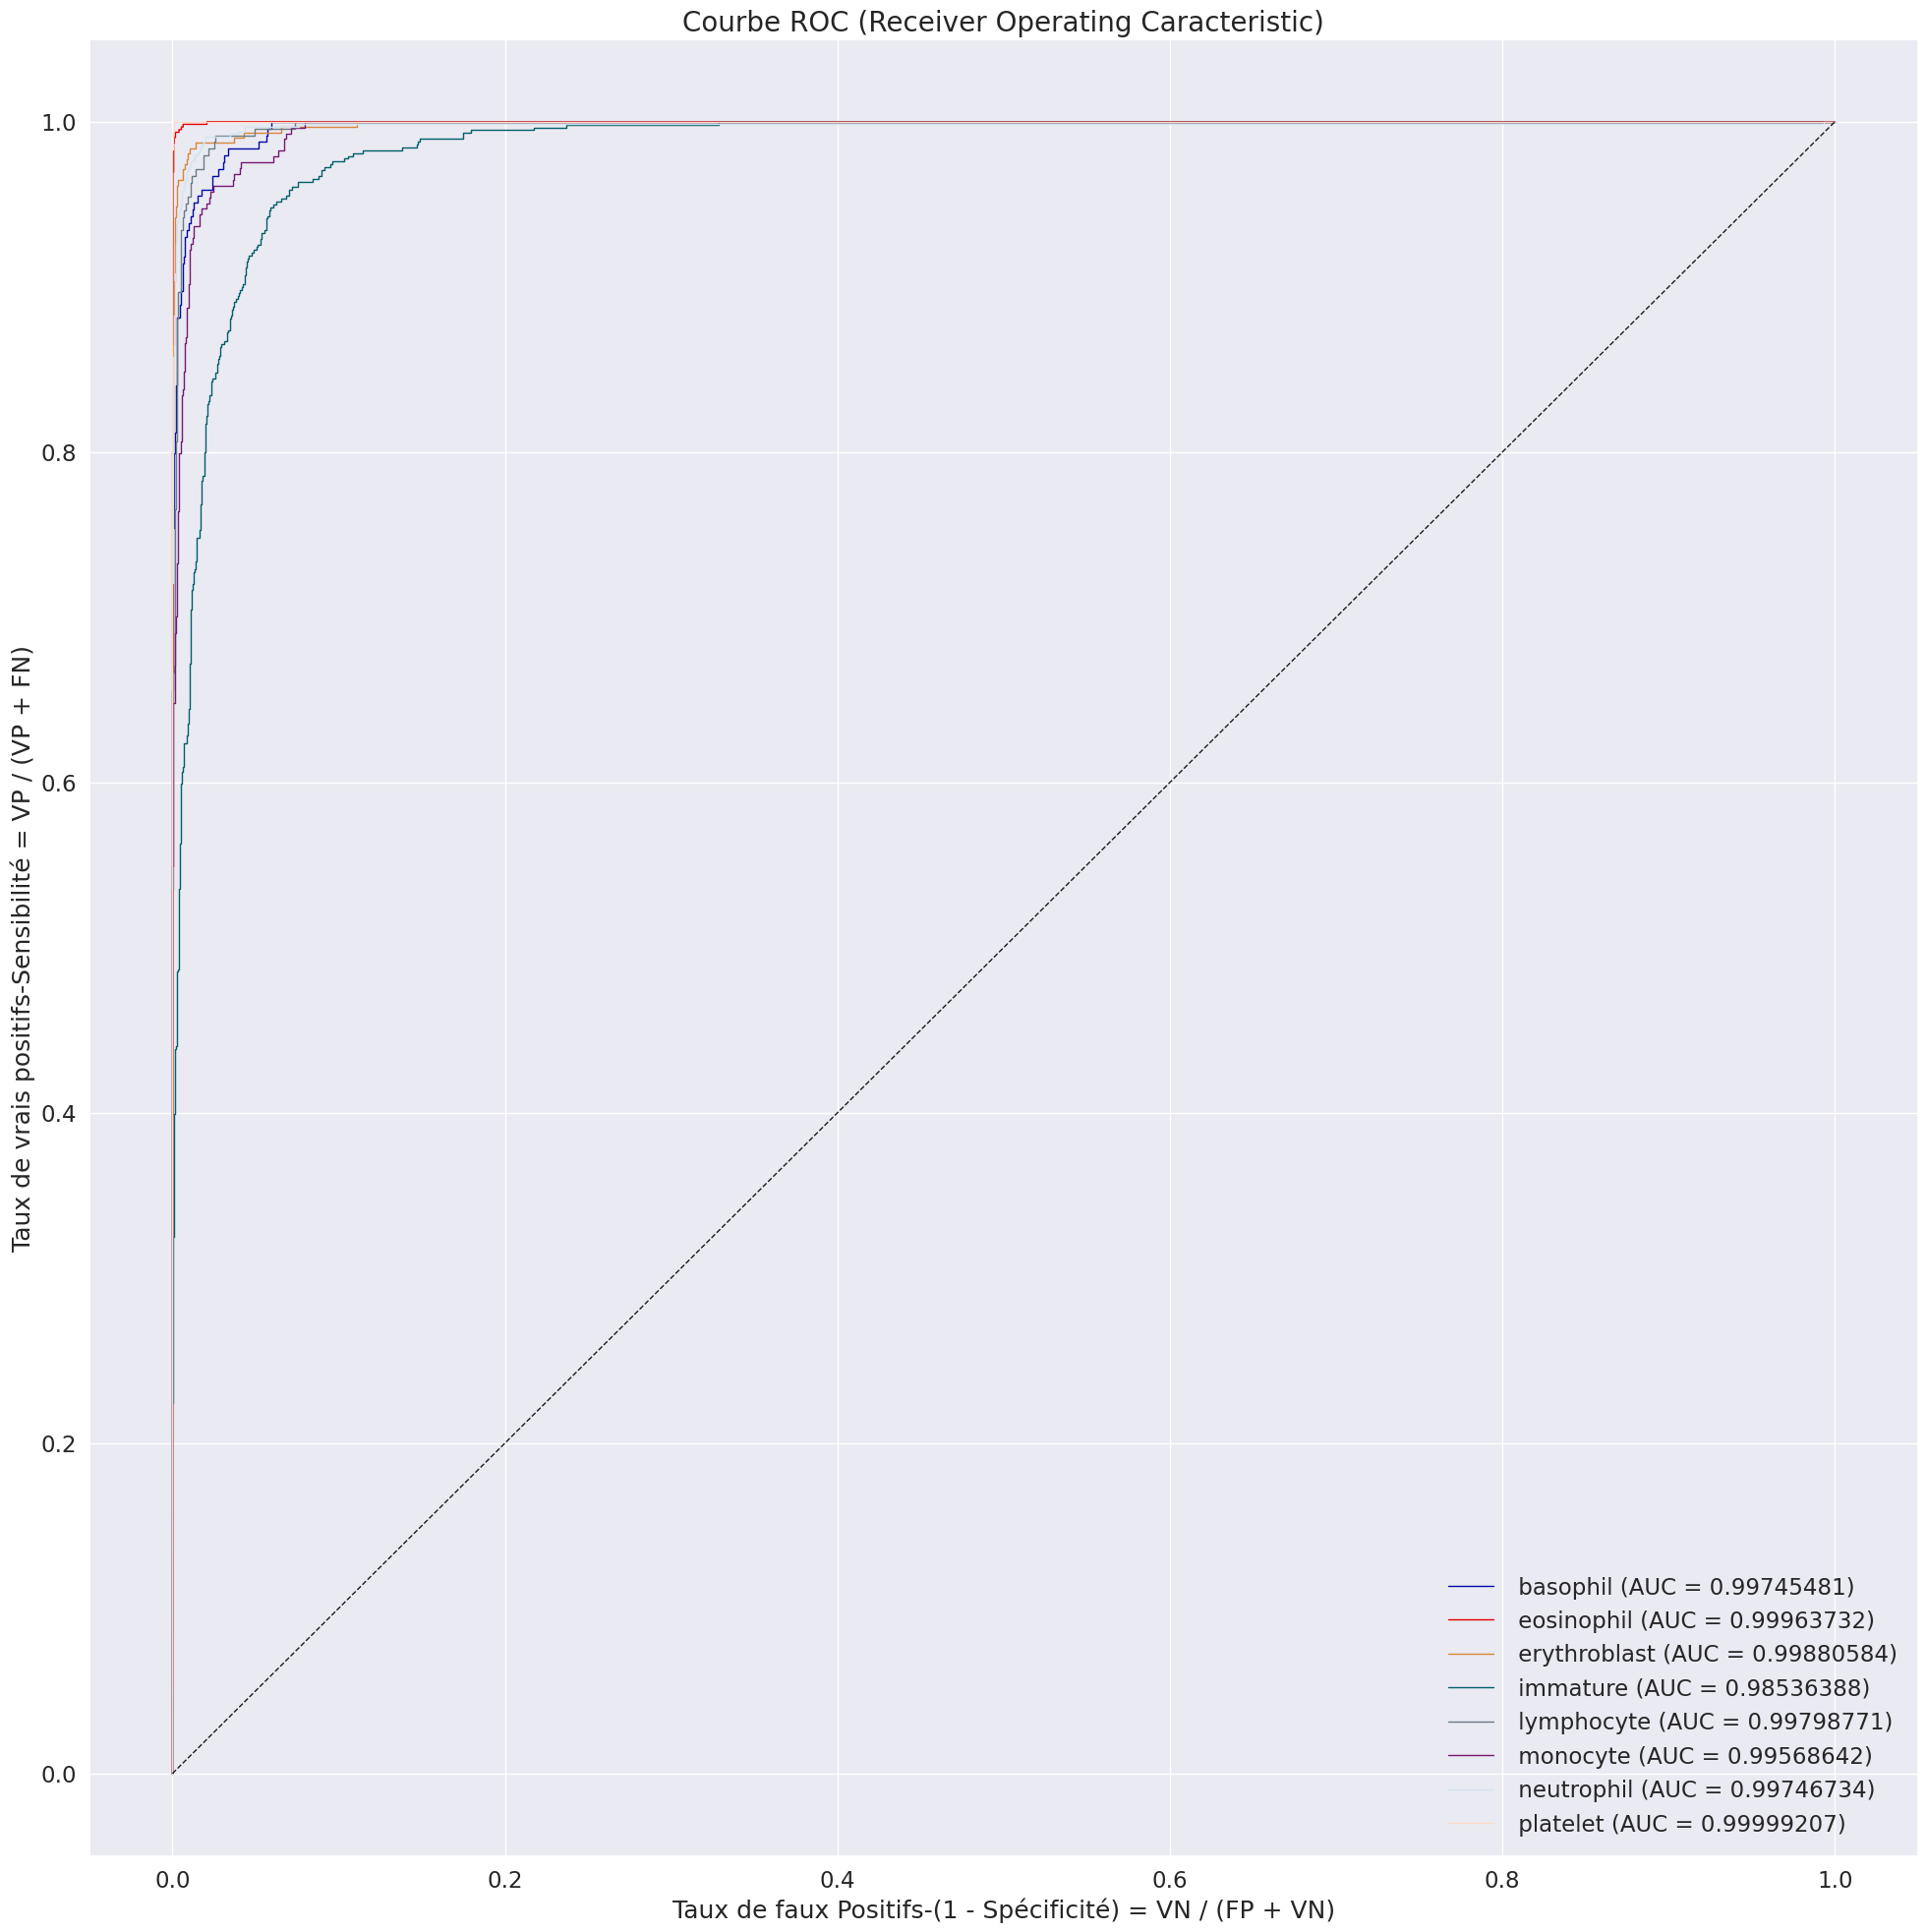

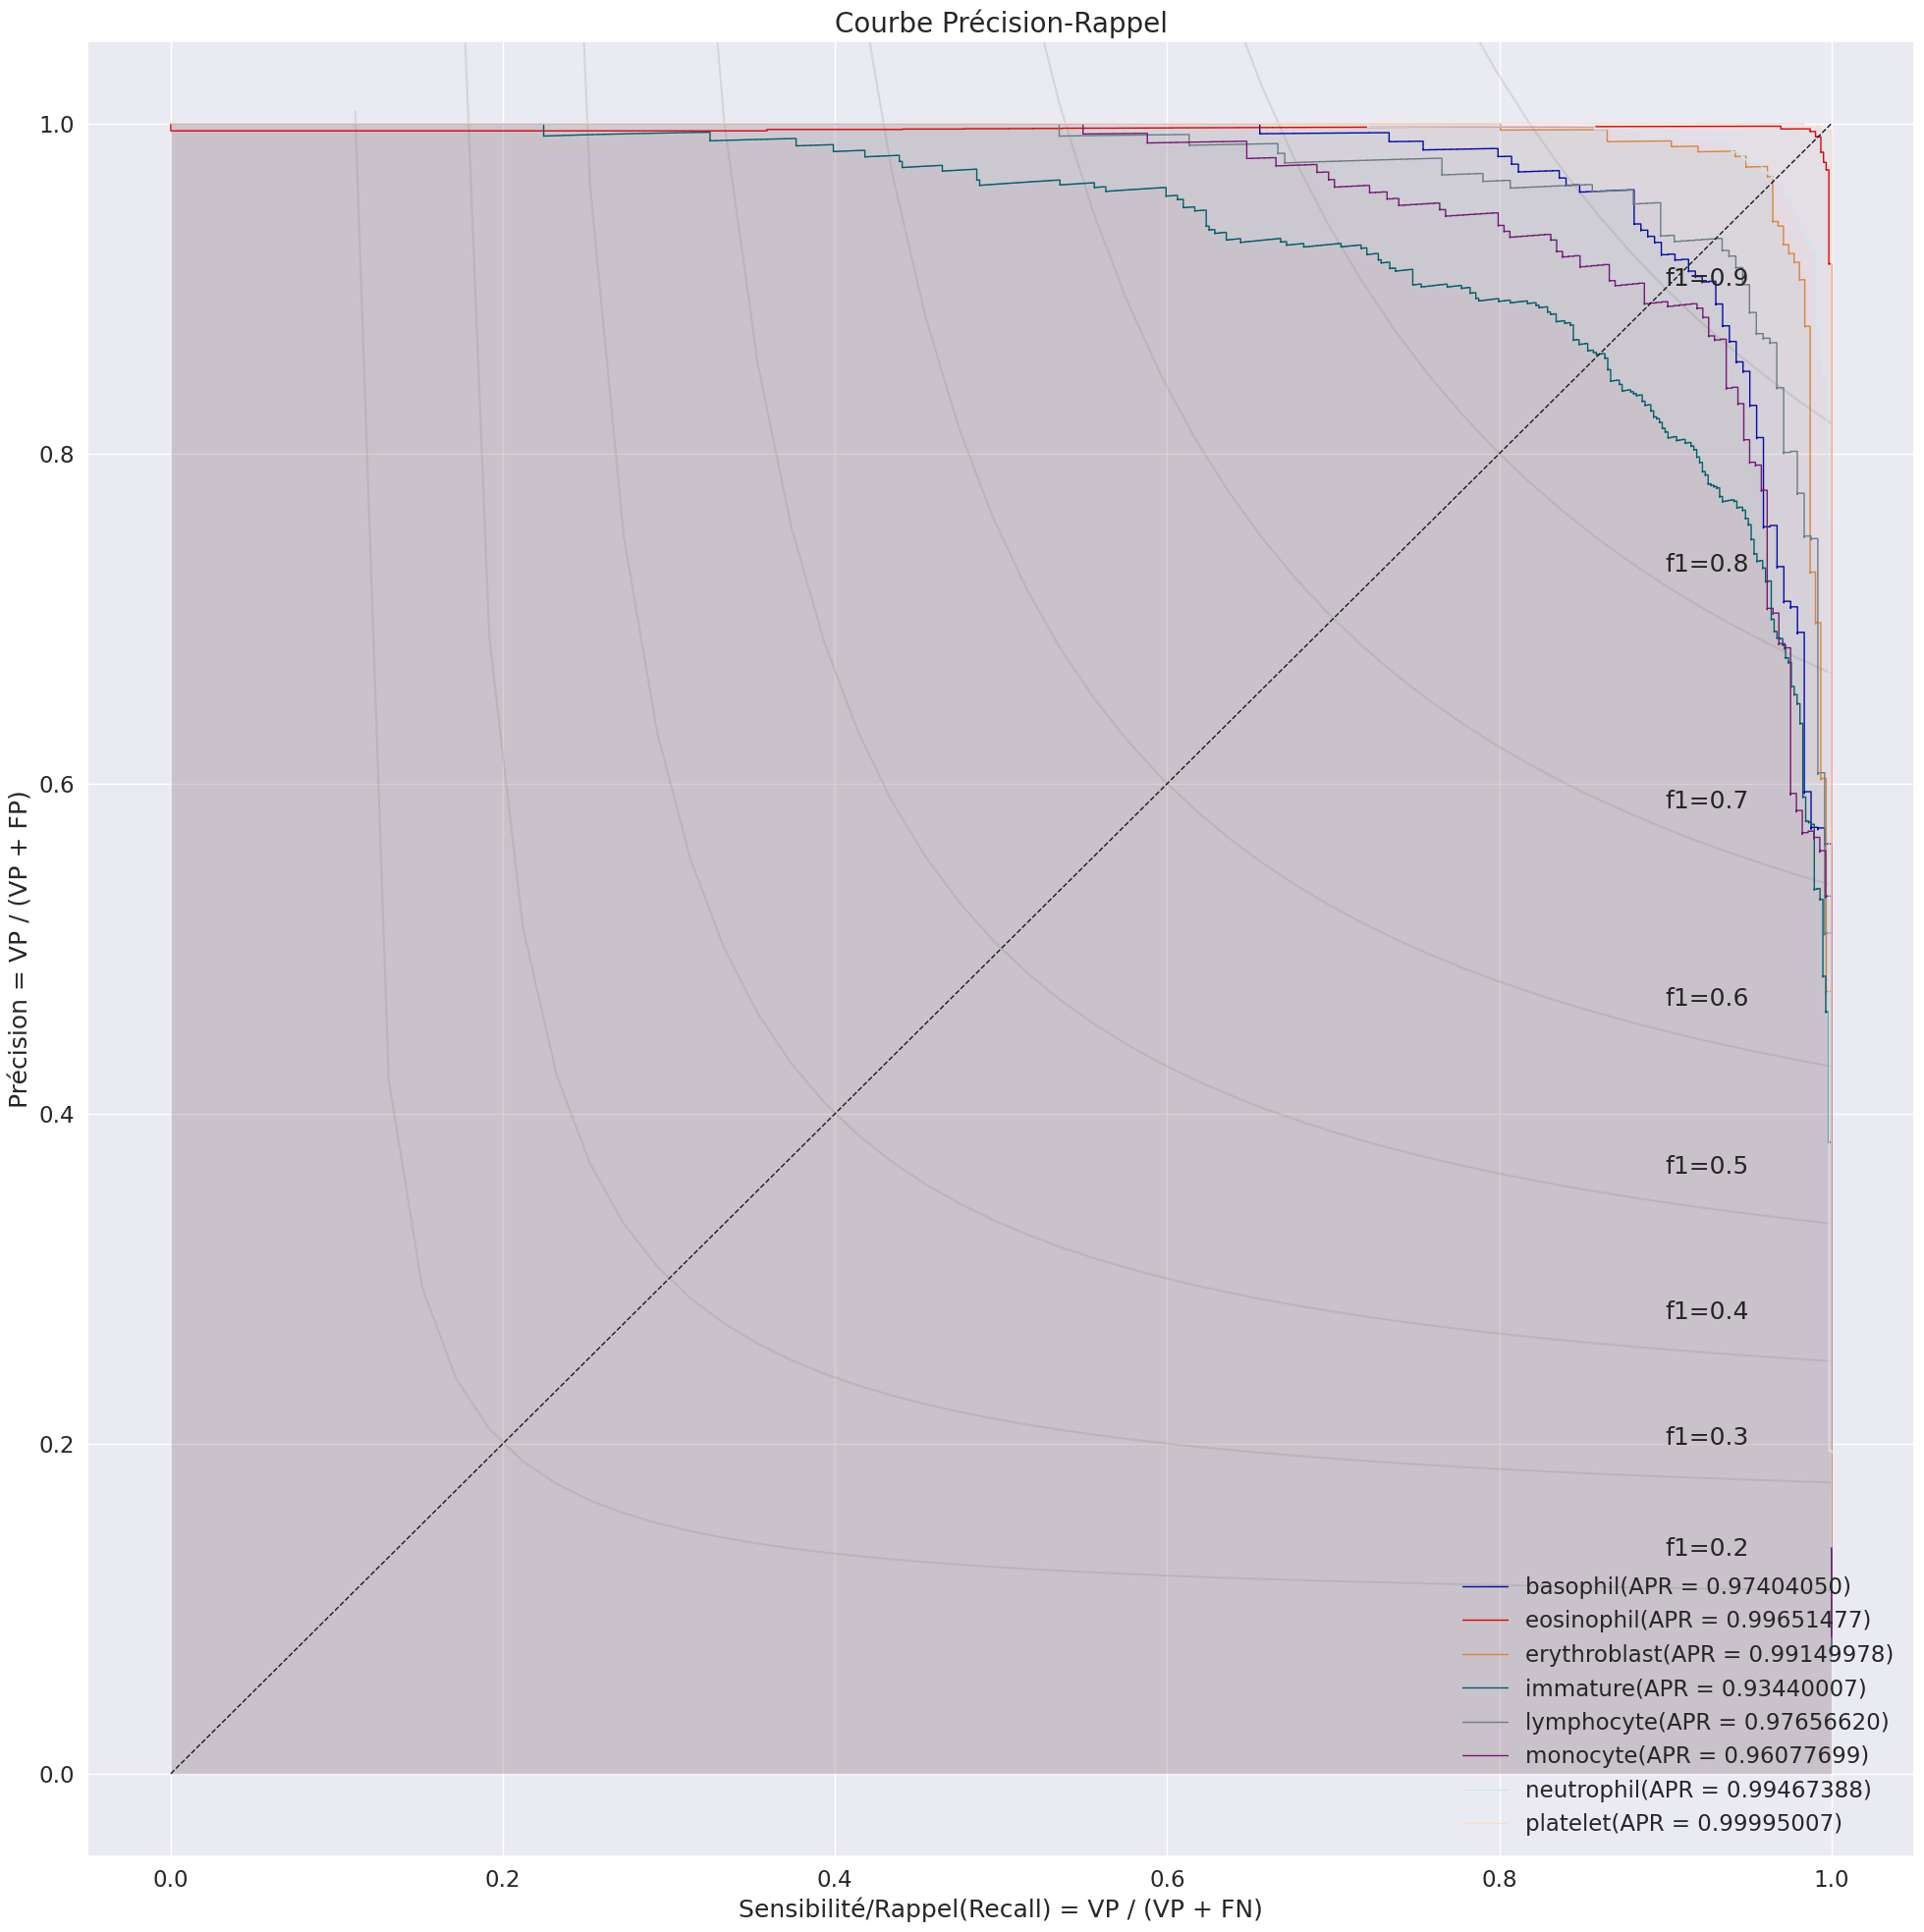

In [29]:
resultats = executeApprentissageChoixClassifieurs(
                                                  model,
                                                  X_test=images,
                                                  y_test=labels,
                                                  label_dict=dictLabels,
                                                  palette=palette, 
                                                  repertoireEnregistrement=repertoireEnregistrement,    
                                                  nom_essai = f'{nomModel}-bs{batch_size:02d}-epochs{epochs:03d}',
                                                 );

resultats.to_parquet(os.path.join(repertoireSauvegardes,f'resultats-{nomModel}-bs{batch_size:02d}-epochs{epochs:03d}.gzip'),compression='gzip', engine='pyarrow')

resultats